In [50]:
import iris
import glob
import os, sys
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import general_io as gio

In [51]:
hist_files = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Omon/water-mass/gn/v20190710/water-mass_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_*.nc')
hist_files.sort()

In [52]:
hist_vcube, history = gio.combine_files(hist_files, 'ocean_volume')
hist_vcube.summary(shorten=True)

'ocean_volume / (m3)                 (year: 165; sea_water_potential_temperature: 127; region: 7)'

In [53]:
hist_vscube, history = gio.combine_files(hist_files, 'Sea Water Salinity times Ocean Grid-Cell Volume')
hist_vscube.summary(shorten=True)

'Sea Water Salinity times Ocean Grid-Cell Volume / (g/kg m3) (year: 165; sea_water_potential_temperature: 127; region: 7)'

In [54]:
hist_vtcube, history = gio.combine_files(hist_files, 'Sea Water Potential Temperature times Ocean Grid-Cell Volume')
hist_vtcube.summary(shorten=True)

'Sea Water Potential Temperature times Ocean Grid-Cell Volume / (degC m3) (year: 165; sea_water_potential_temperature: 127; region: 7)'

In [66]:
control_files = glob.glob('/g/data/r87/dbi599/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/piControl/r1i1p1f1/Omon/water-mass/gn/v20190710/water-mass_Omon_MPI-ESM1-2-HR_piControl_r1i1p1f1_gn_*.nc')
control_files.sort()

In [67]:
control_vcube, history = gio.combine_files(control_files, 'ocean_volume')
control_vcube.summary(shorten=True)

'ocean_volume / (m3)                 (year: 270; sea_water_potential_temperature: 127; region: 7)'

In [68]:
control_vscube, history = gio.combine_files(control_files, 'Sea Water Salinity times Ocean Grid-Cell Volume')
control_vscube.summary(shorten=True)

'Sea Water Salinity times Ocean Grid-Cell Volume / (g/kg m3) (year: 270; sea_water_potential_temperature: 127; region: 7)'

In [69]:
control_vtcube, history = gio.combine_files(control_files, 'Sea Water Potential Temperature times Ocean Grid-Cell Volume')
control_vtcube.summary(shorten=True)

'Sea Water Potential Temperature times Ocean Grid-Cell Volume / (degC m3) (year: 270; sea_water_potential_temperature: 127; region: 7)'

In [75]:
basin_numbers = {'North Atlantic': 11,
                 'South Atlantic': 12,
                 'North Pacific': 13,
                 'South Pacific': 14,
                 'Indian': 15,
                 'Arctic': 16,
                 'Marginal Seas and Land': 17}


def plot_timeseries(hist_cube, control_cube, basin_name):
    """Plot timeseries for each temperature bin of an ocean basin."""

    basin_number = basin_numbers[basin_name]
    
    for temp_index in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, -1]:
        hcube = hist_cube[:, temp_index, :]
        hcube = hcube.extract(iris.Constraint(region=basin_number))

        ccube = control_cube[:, temp_index, :]
        ccube = ccube.extract(iris.Constraint(region=basin_number))

        temperature = hcube.coord('sea_water_potential_temperature').points[0]
    
        iplt.plot(hcube, color='red', label='historical')
        iplt.plot(ccube, color='black', label='piControl')
        
        plt.title(basin_name + ', ' + str(temperature) + 'C')
        plt.ylabel('%s (%s)'  %(hcube.long_name, hcube.units))
        plt.legend()
        plt.show()

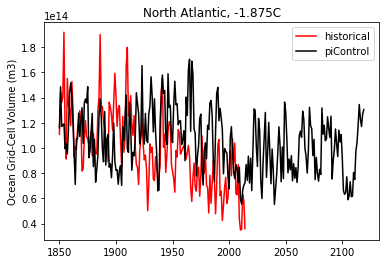

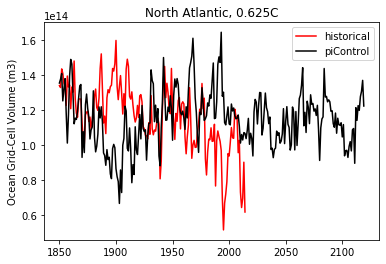

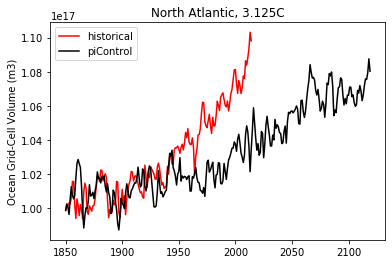

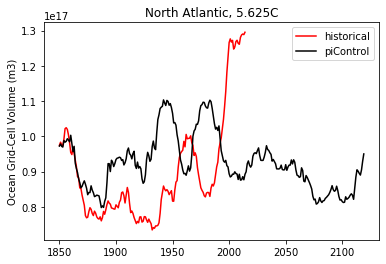

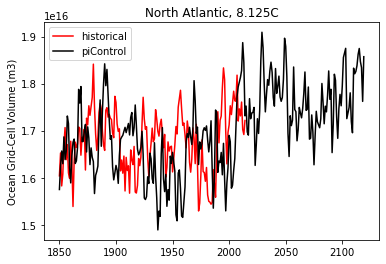

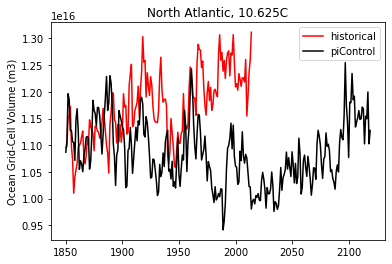

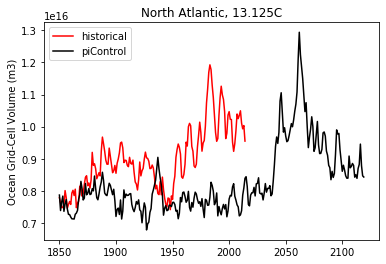

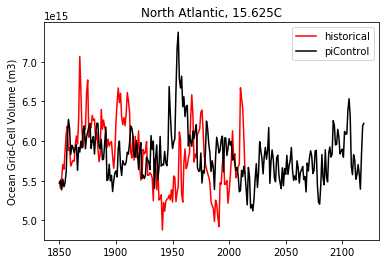

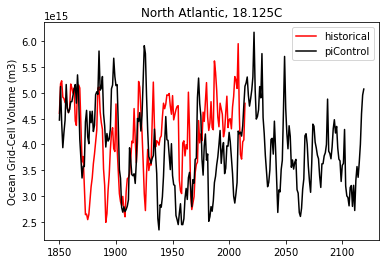

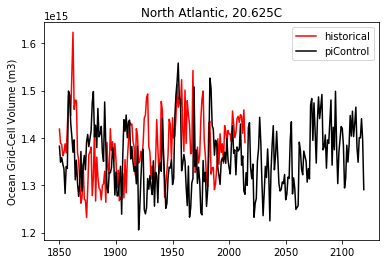

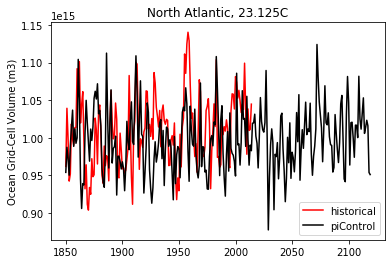

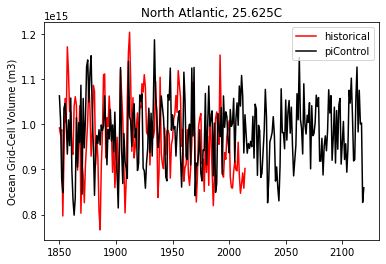

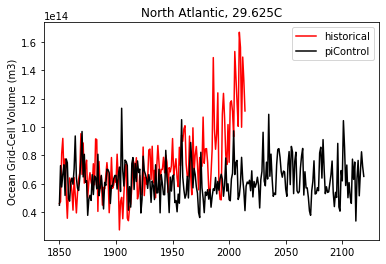

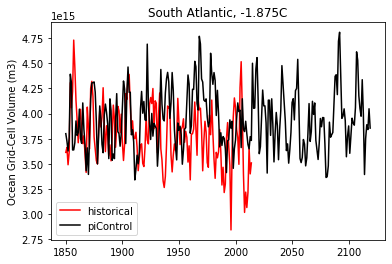

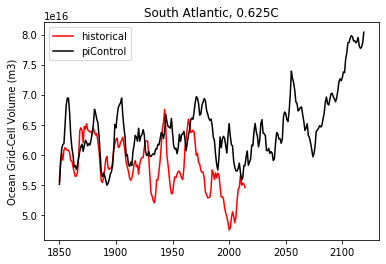

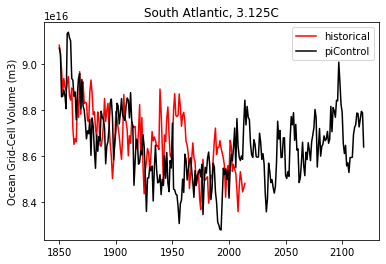

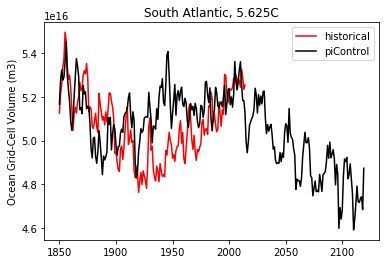

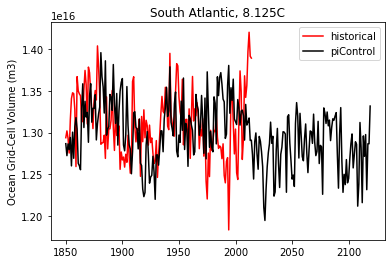

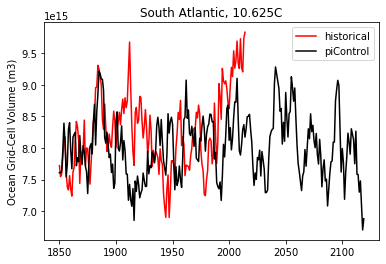

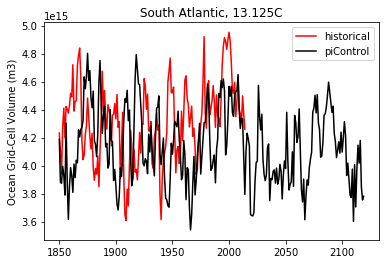

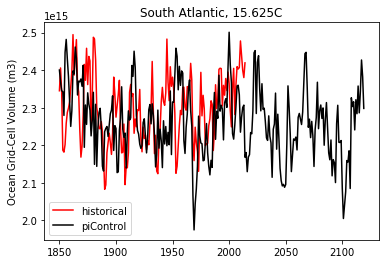

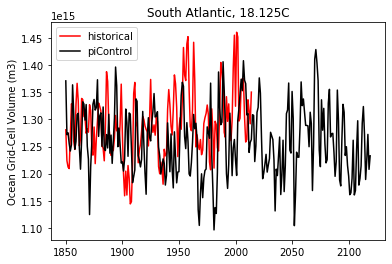

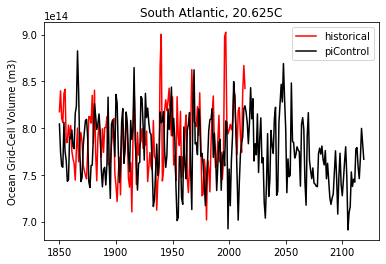

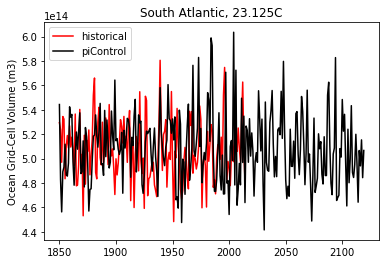

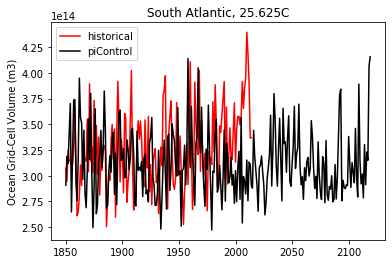

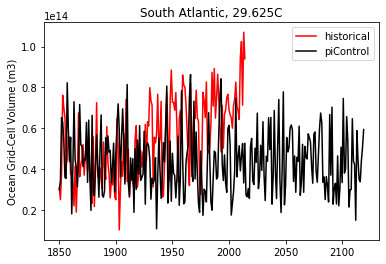

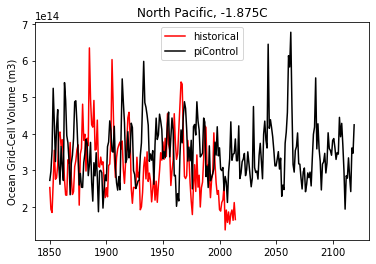

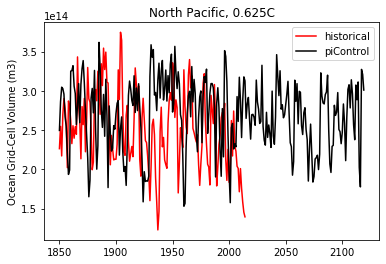

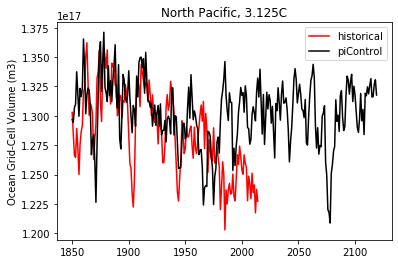

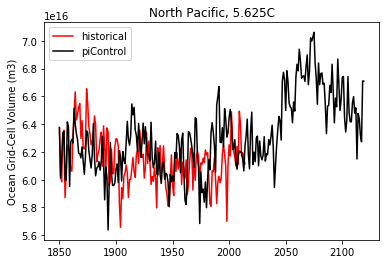

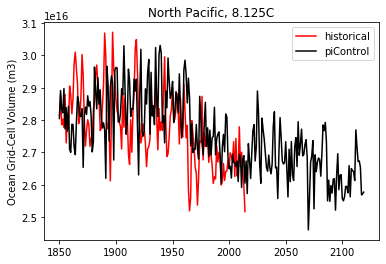

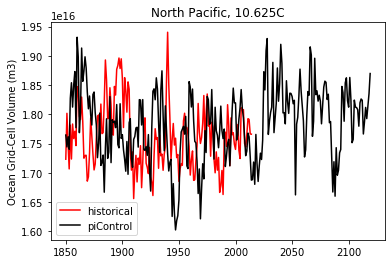

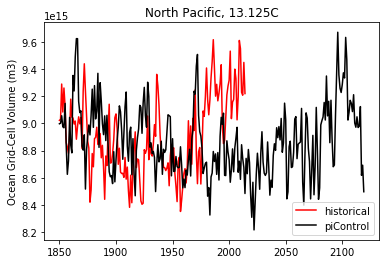

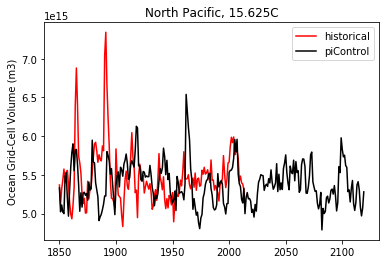

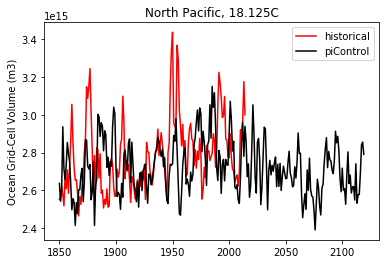

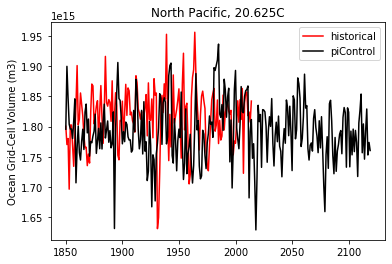

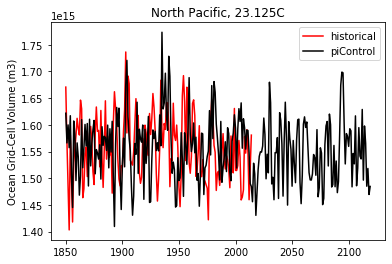

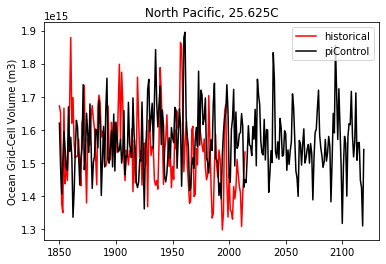

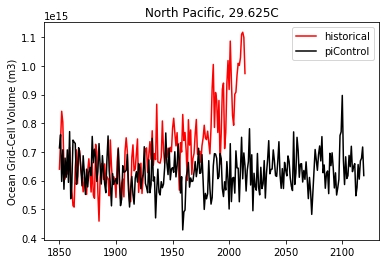

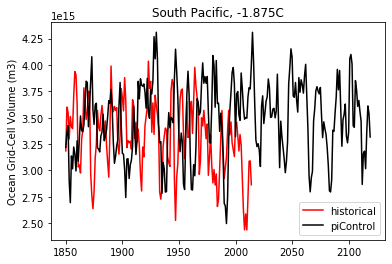

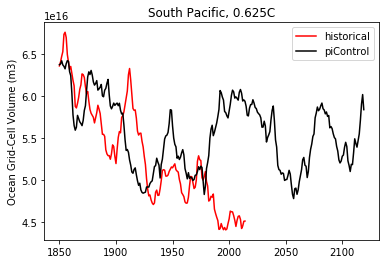

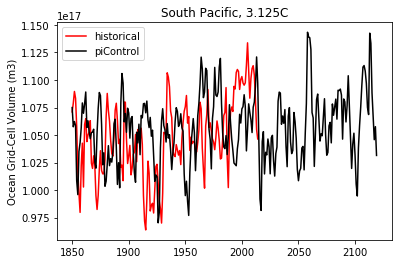

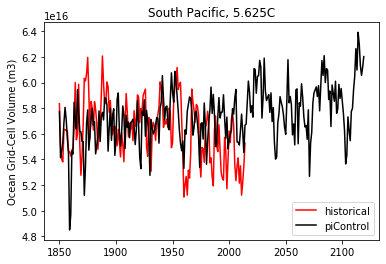

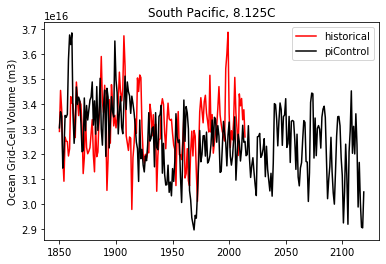

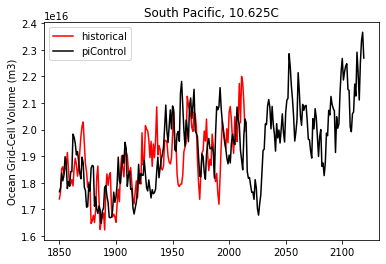

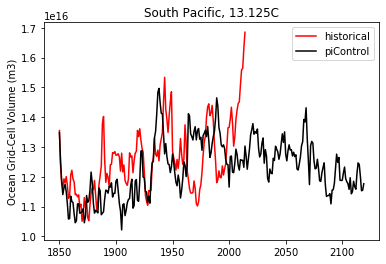

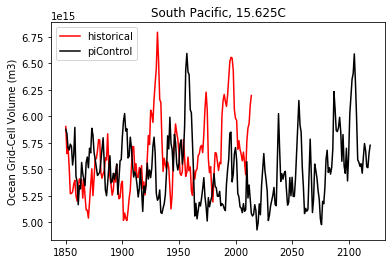

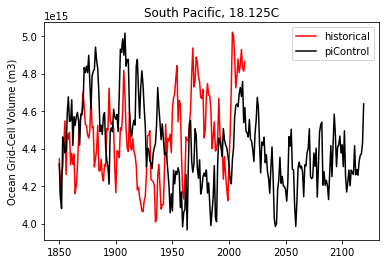

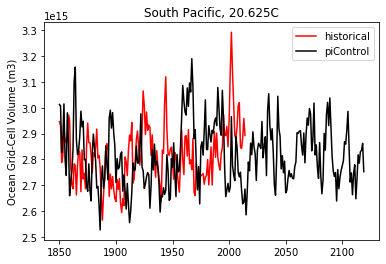

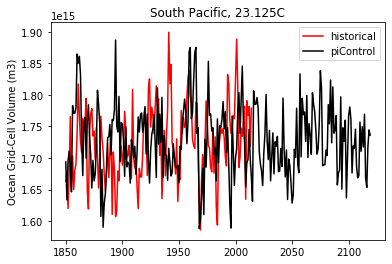

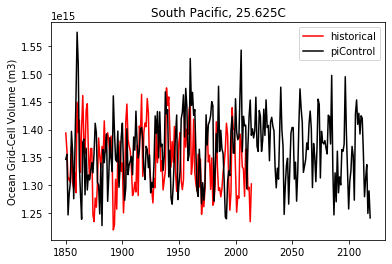

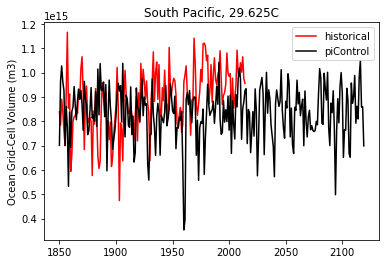

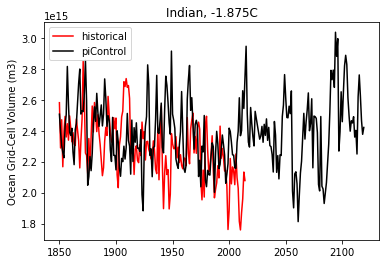

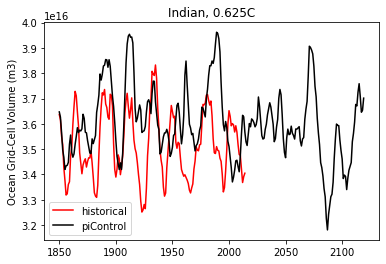

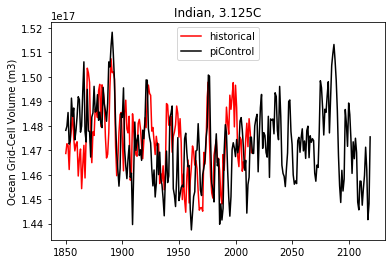

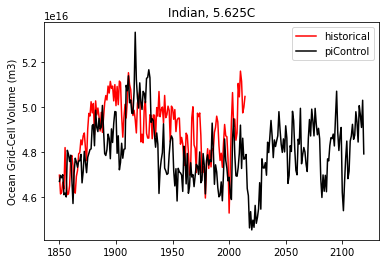

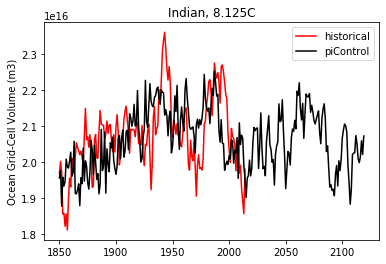

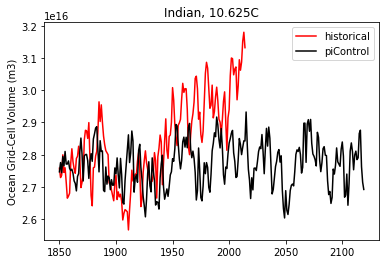

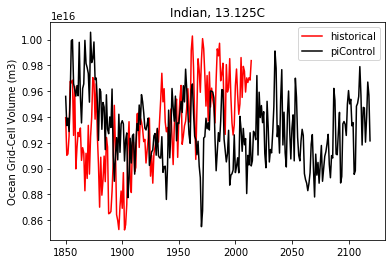

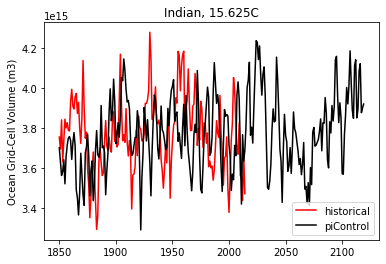

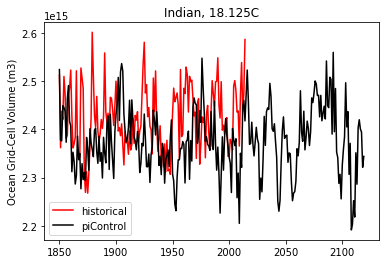

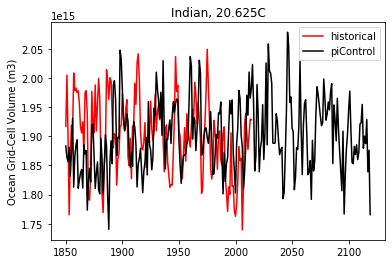

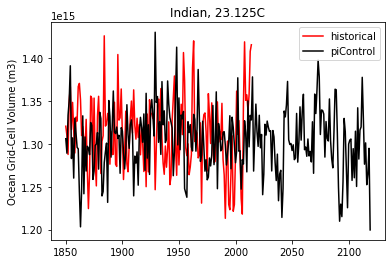

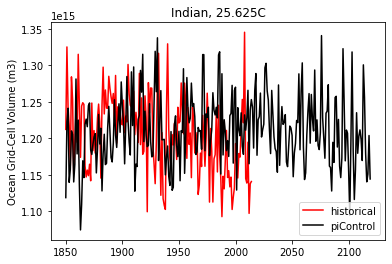

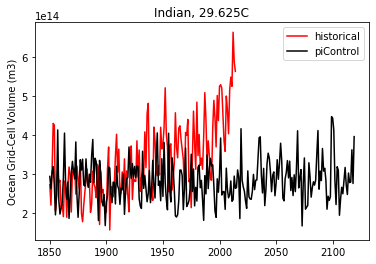

In [76]:
for basin in ['North Atlantic', 'South Atlantic', 'North Pacific', 'South Pacific', 'Indian']:
    plot_timeseries(hist_vcube, control_vcube, basin)

In [85]:
hist_scube = hist_vscube / hist_vcube
hist_scube.standard_name = 'sea_water_salinity'
hist_scube.long_name = 'Sea Water Salinity'
hist_scube.var_name = 'so'
hist_scube.units = 'g/kg'

In [86]:
control_scube = control_vscube / control_vcube
control_scube.standard_name = 'sea_water_salinity'
control_scube.long_name = 'Sea Water Salinity'
control_scube.var_name = 'so'
control_scube.units = 'g/kg'

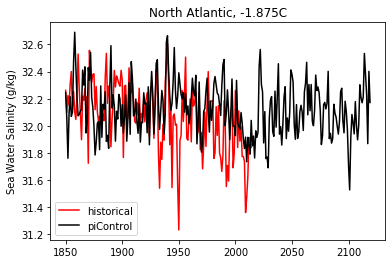

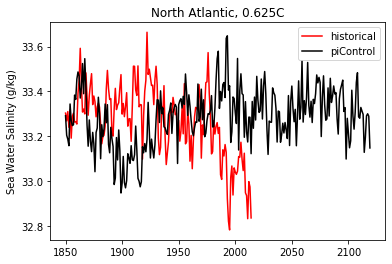

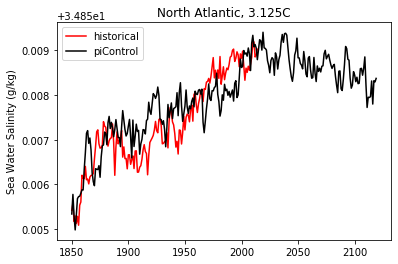

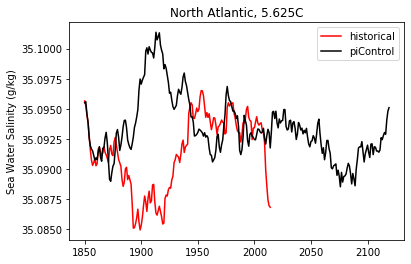

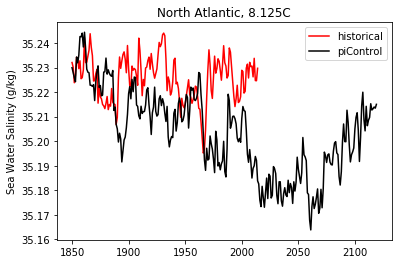

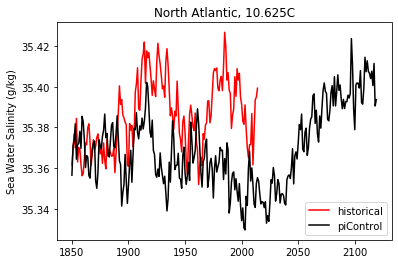

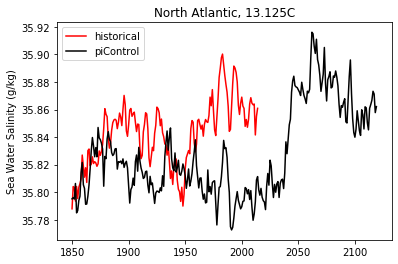

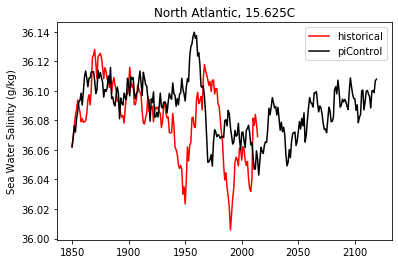

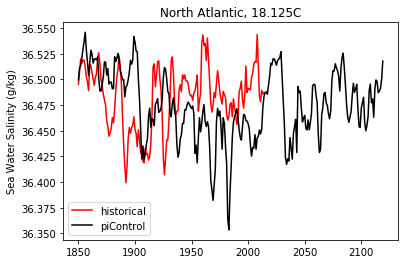

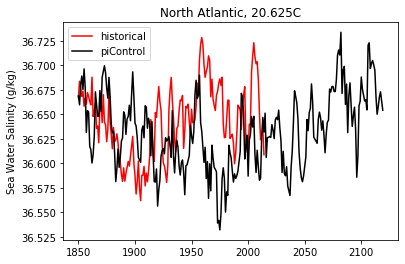

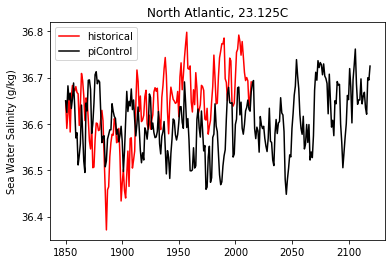

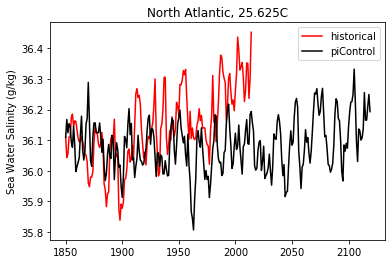

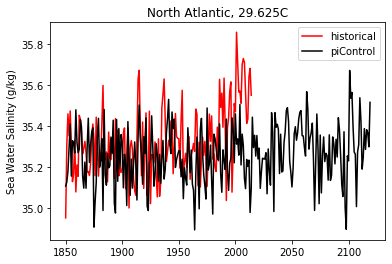

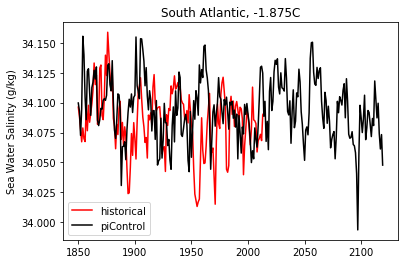

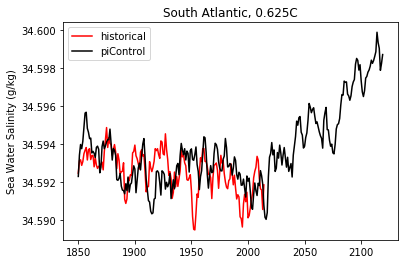

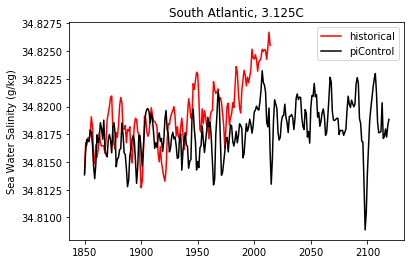

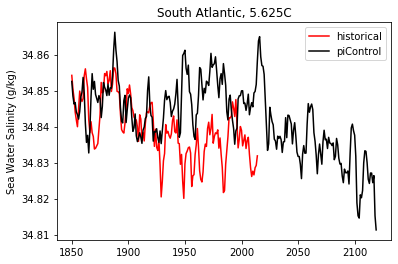

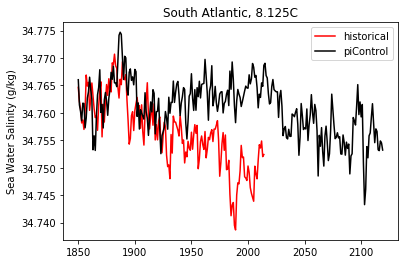

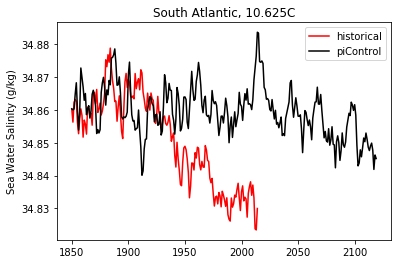

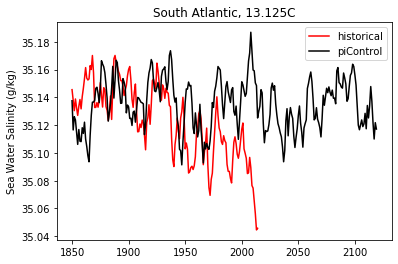

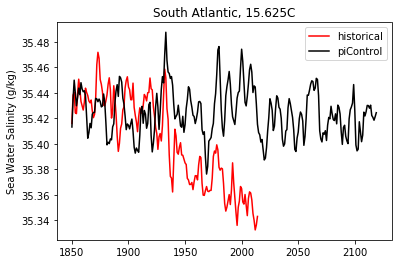

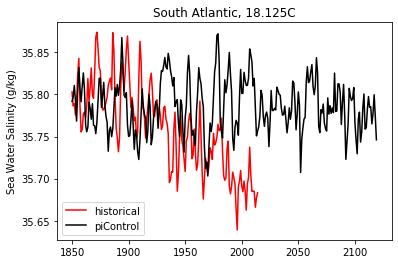

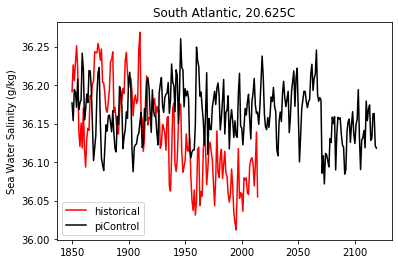

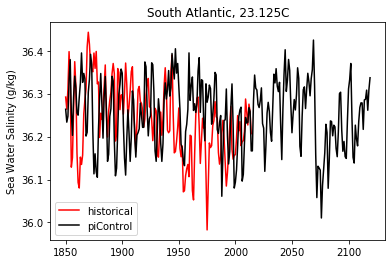

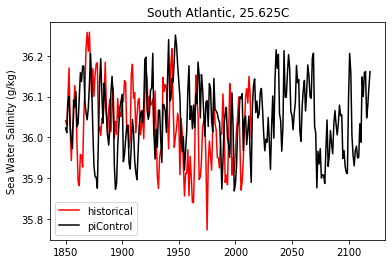

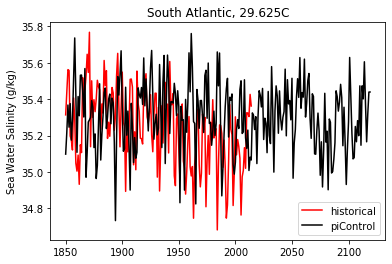

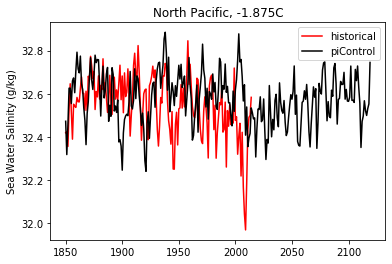

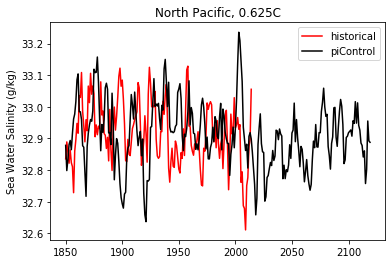

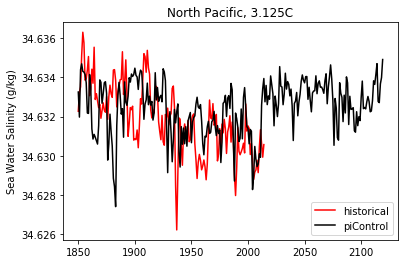

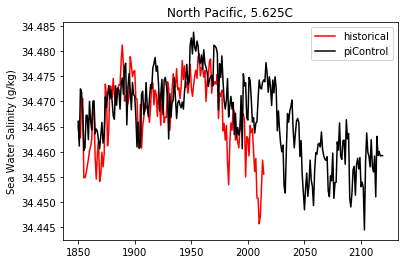

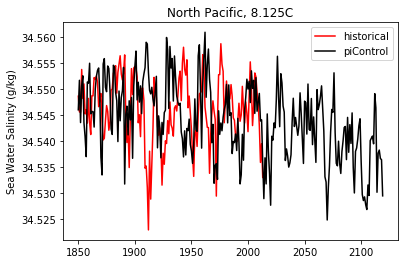

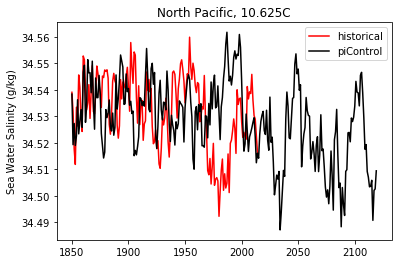

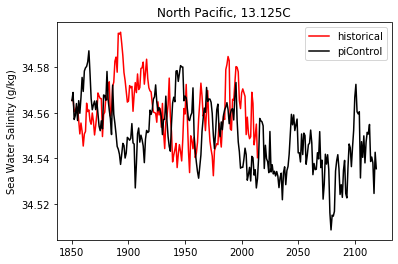

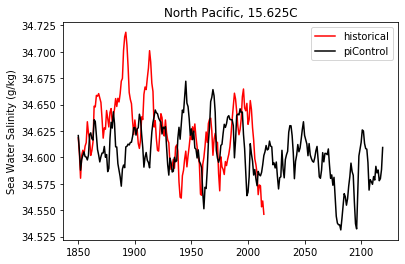

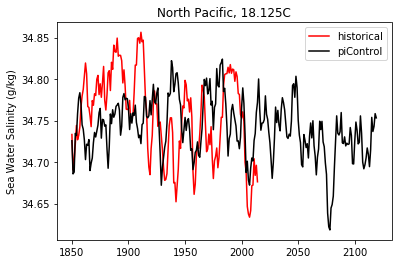

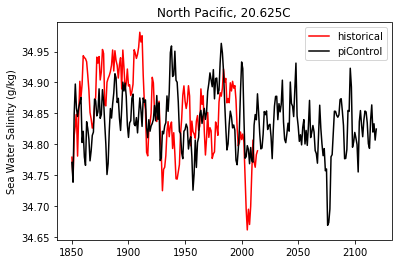

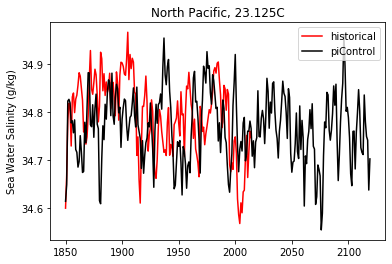

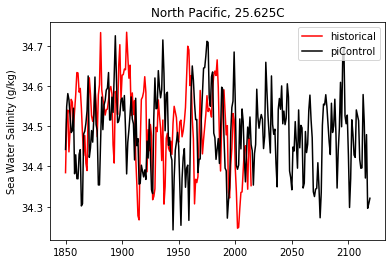

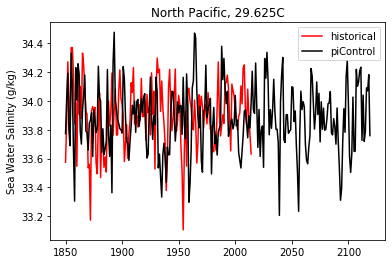

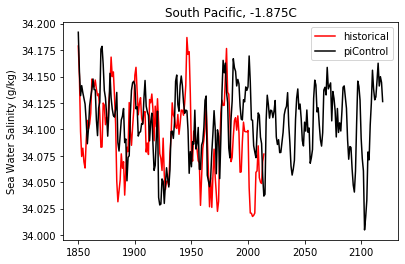

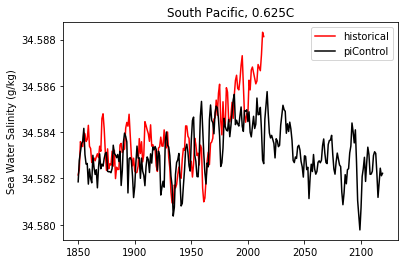

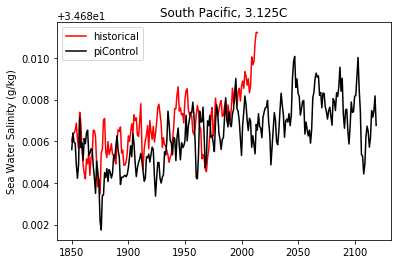

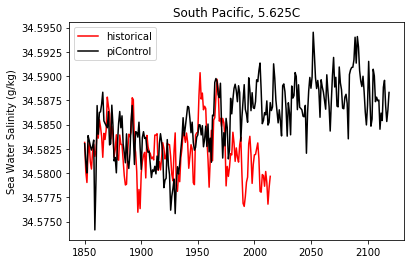

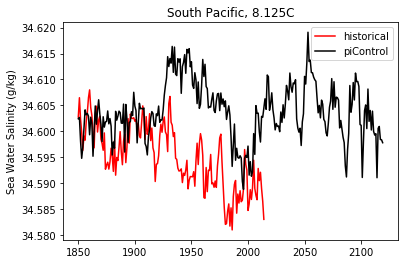

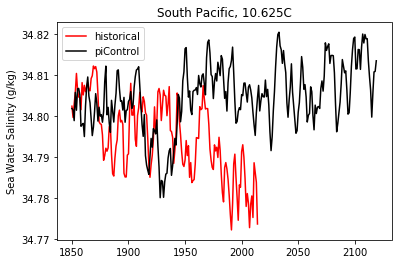

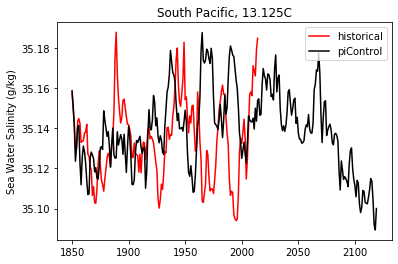

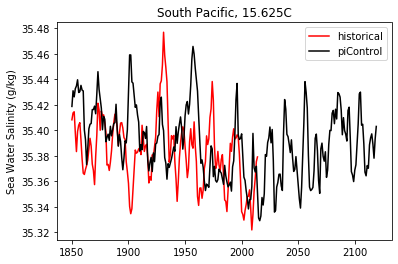

In [ ]:
for basin in ['North Atlantic', 'South Atlantic', 'North Pacific', 'South Pacific', 'Indian']:
    plot_timeseries(hist_scube, control_scube, basin)